<a href="https://colab.research.google.com/github/joelpawar08/All-DL-and-ML-Alogs-with-Examples/blob/master/NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 33.33%


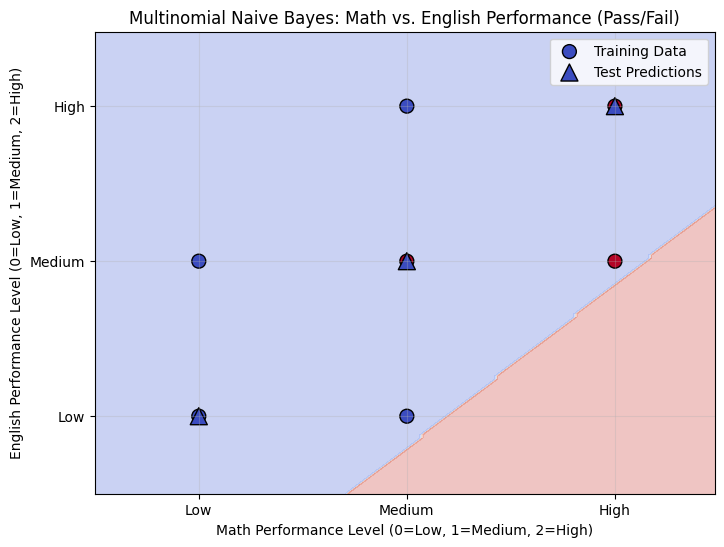


New Student (Math: Medium, English: High)
Predicted Probability of Passing: 0.377
Prediction: FAIL


In [2]:
# Import necessary libraries
# numpy for numerical operations, matplotlib for plotting, sklearn for Multinomial Naive Bayes and utilities
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Create a self-made dataset
# Simulate student performance levels (Low=0, Medium=1, High=2) in Math and English vs. Pass/Fail outcomes
# Features: Categorical Math and English performance levels; Label: Pass (1) or Fail (0)
np.random.seed(42)  # For reproducibility
math_levels = np.array([0, 0, 0, 1, 1, 1, 1, 2, 2, 2])  # 0=Low, 1=Medium, 2=High
english_levels = np.array([0, 0, 1, 0, 1, 1, 2, 1, 2, 2])  # 0=Low, 1=Medium, 2=High
performance = np.column_stack((math_levels, english_levels))  # Combine into 2D feature matrix
pass_fail = np.array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1])  # Labels: Pass (1) or Fail (0)

# Step 2: Split data into training and testing sets
# 70% training, 30% testing to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(performance, pass_fail, test_size=0.3, random_state=42)

# Step 3: Create and fit the Multinomial Naive Bayes model
# MultinomialNB is suitable for categorical/count data, assumes multinomial distribution
model = MultinomialNB()  # Initialize Multinomial Naive Bayes
model.fit(X_train, y_train)  # Train the model on training data

# Step 4: Make predictions
# Predict pass/fail for test data based on probability estimates
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
# Accuracy measures % of correct predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Step 6: Visualize the data and decision boundary
# Plot data points and decision regions for 2D categorical feature space
plt.figure(figsize=(8, 6))
# Create a mesh grid for plotting decision boundary (categorical: 0, 1, 2)
xx, yy = np.meshgrid(np.arange(-0.5, 2.5, 0.02), np.arange(-0.5, 2.5, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # Predict for each grid point
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Plot decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, edgecolors='k', cmap='coolwarm', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=150, marker='^', edgecolors='k', cmap='coolwarm', label='Test Predictions')
plt.xlabel('Math Performance Level (0=Low, 1=Medium, 2=High)')
plt.ylabel('English Performance Level (0=Low, 1=Medium, 2=High)')
plt.title('Multinomial Naive Bayes: Math vs. English Performance (Pass/Fail)')
plt.xticks([0, 1, 2], ['Low', 'Medium', 'High'])  # Label categorical axes
plt.yticks([0, 1, 2], ['Low', 'Medium', 'High'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Step 7: Predict for a new student
new_student = np.array([[1, 2]])  # Math: Medium (1), English: High (2)
prediction = model.predict(new_student)
prob_pass = model.predict_proba(new_student)[:, 1][0]
print(f"\nNew Student (Math: Medium, English: High)")
print(f"Predicted Probability of Passing: {prob_pass:.3f}")
print(f"Prediction: {'PASS' if prediction[0] == 1 else 'FAIL'}")

# Explanation of Multinomial Naive Bayes:
# - Uses Bayes' theorem: P(Class|Features) = P(Features|Class) * P(Class) / P(Features)
# - "Naive" assumption: Features (Math, English levels) are conditionally independent given the class
# - MultinomialNB: Designed for categorical/count data (e.g., word counts, performance levels)
# - Use case: Text classification (spam detection), document categorization
# - Pros: Fast, simple, effective for categorical data, handles sparse data well
# - Cons: Assumes feature independence, less effective for continuous data